<a href="https://colab.research.google.com/github/Amarsinh0/PROJECT_WORK/blob/main/Copy_of_Project_An_end_to_end_chatbot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project**:**End to End Chatbot**

# **What is an End to End Chatbot?**


An end-to-end chatbot refers to a chatbot that can handle a complete conversation from start to finish without requiring human assistance. To create an end-to-end chatbot, you need to write a computer program that can understand user requests, generate appropriate responses, and take action when necessary. This involves collecting data, choosing a programming language and NLP tools, training the chatbot, and testing and refining it before making it available to users.

Once deployed, users can interact with the chatbot by sending it multiple requests and the chatbot can handle the entire conversation itself. To create an end-to-end chatbot using Python, we can follow the steps mentioned below:



1) Define Intents

2) Create training data

3) Train the chatbot

4) Build the chatbot

5) Test the chatbot

6) Deploy the chatbot


I hope you now have understood what an end-to-end chatbot is and the process of creating an end-to-end chatbot. In the section below, I’ll walk you through how to build an end-to-end chatbot using Python.

# **End to End Chatbot using Python**

Now let’s start with creating an end-to-end chatbot using Python. I’ll start this task by importing the necessary Python libraries for this task:

In [ ]:
pip install streamlit


In [ ]:
import os
import nltk
import ssl
import streamlit as st
import random
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

ssl._create_default_https_context = ssl._create_unverified_context
nltk.data.path.append(os.path.abspath("nltk_data"))
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Now let’s define some intents of the chatbot. You can add more intents to make the chatbot more helpful and more functional:

In [ ]:
intents = [
    {
        "tag": "greeting",
        "patterns": ["Hi", "Hello", "Hey", "How are you", "What's up"],
        "responses": ["Hi there", "Hello", "Hey", "I'm fine, thank you", "Nothing much"]
    },
    {
        "tag": "goodbye",
        "patterns": ["Bye", "See you later", "Goodbye", "Take care"],
        "responses": ["Goodbye", "See you later", "Take care"]
    },
    {
        "tag": "thanks",
        "patterns": ["Thank you", "Thanks", "Thanks a lot", "I appreciate it"],
        "responses": ["You're welcome", "No problem", "Glad I could help"]
    },
    {
        "tag": "about",
        "patterns": ["What can you do", "Who are you", "What are you", "What is your purpose"],
        "responses": ["I am a chatbot", "My purpose is to assist you", "I can answer questions and provide assistance"]
    },
    {
        "tag": "help",
        "patterns": ["Help", "I need help", "Can you help me", "What should I do"],
        "responses": ["Sure, what do you need help with?", "I'm here to help. What's the problem?", "How can I assist you?"]
    },
    {
        "tag": "age",
        "patterns": ["How old are you", "What's your age"],
        "responses": ["I don't have an age. I'm a chatbot.", "I was just born in the digital world.", "Age is just a number for me."]
    },
    {
        "tag": "weather",
        "patterns": ["What's the weather like", "How's the weather today"],
        "responses": ["I'm sorry, I cannot provide real-time weather information.", "You can check the weather on a weather app or website."]
    },
    {
        "tag": "budget",
        "patterns": ["How can I make a budget", "What's a good budgeting strategy", "How do I create a budget"],
        "responses": ["To make a budget, start by tracking your income and expenses. Then, allocate your income towards essential expenses like rent, food, and bills. Next, allocate some of your income towards savings and debt repayment. Finally, allocate the remainder of your income towards discretionary expenses like entertainment and hobbies.", "A good budgeting strategy is to use the 50/30/20 rule. This means allocating 50% of your income towards essential expenses, 30% towards discretionary expenses, and 20% towards savings and debt repayment.", "To create a budget, start by setting financial goals for yourself. Then, track your income and expenses for a few months to get a sense of where your money is going. Next, create a budget by allocating your income towards essential expenses, savings and debt repayment, and discretionary expenses."]
    },
    {
        "tag": "credit_score",
        "patterns": ["What is a credit score", "How do I check my credit score", "How can I improve my credit score"],
        "responses": ["A credit score is a number that represents your creditworthiness. It is based on your credit history and is used by lenders to determine whether or not to lend you money. The higher your credit score, the more likely you are to be approved for credit.", "You can check your credit score for free on several websites such as Credit Karma and Credit Sesame."]
    }
]

## Now let’s prepare the intents and train a Machine Learning model for the chatbot:

In [ ]:
# Create the vectorizer and classifier
vectorizer = TfidfVectorizer()
clf = LogisticRegression(random_state=0, max_iter=10000)

# Preprocess the data
tags = []
patterns = []
for intent in intents:
    for pattern in intent['patterns']:
        tags.append(intent['tag'])
        patterns.append(pattern)

# training the model
x = vectorizer.fit_transform(patterns)
y = tags
clf.fit(x, y)

LogisticRegression(max_iter=10000, random_state=0)

## **Now let’s write a Python function to chat with the chatbot:**

In [ ]:
def chatbot(input_text):
    input_text = vectorizer.transform([input_text])
    tag = clf.predict(input_text)[0]
    for intent in intents:
        if intent['tag'] == tag:
            response = random.choice(intent['responses'])
            return response

### Till now, we have created the chatbot. After running the code, you can interact with the chatbot in the terminal itself. To turn this chatbot into an end-to-end chatbot, we need to deploy it to interact with the chatbot using a user interface. To deploy the chatbot, I will use the streamlit library in Python, which provides amazing features to create a user interface for a Machine Learning application in just a few lines of code.

# **deploy the chatbot using Python:**

In [ ]:
counter = 0

def main():
    global counter
    st.title("Chatbot")
    st.write("Welcome to the chatbot. Please type a message and press Enter to start the conversation.")

    counter += 1
    user_input = st.text_input("You:", key=f"user_input_{counter}")

    if user_input:
        response = chatbot(user_input)
        st.text_area("Chatbot:", value=response, height=100, max_chars=None, key=f"chatbot_response_{counter}")

        if response.lower() in ['goodbye', 'bye']:
            st.write("Thank you for chatting with me. Have a great day!")
            st.stop()

if __name__ == '__main__':
    main()


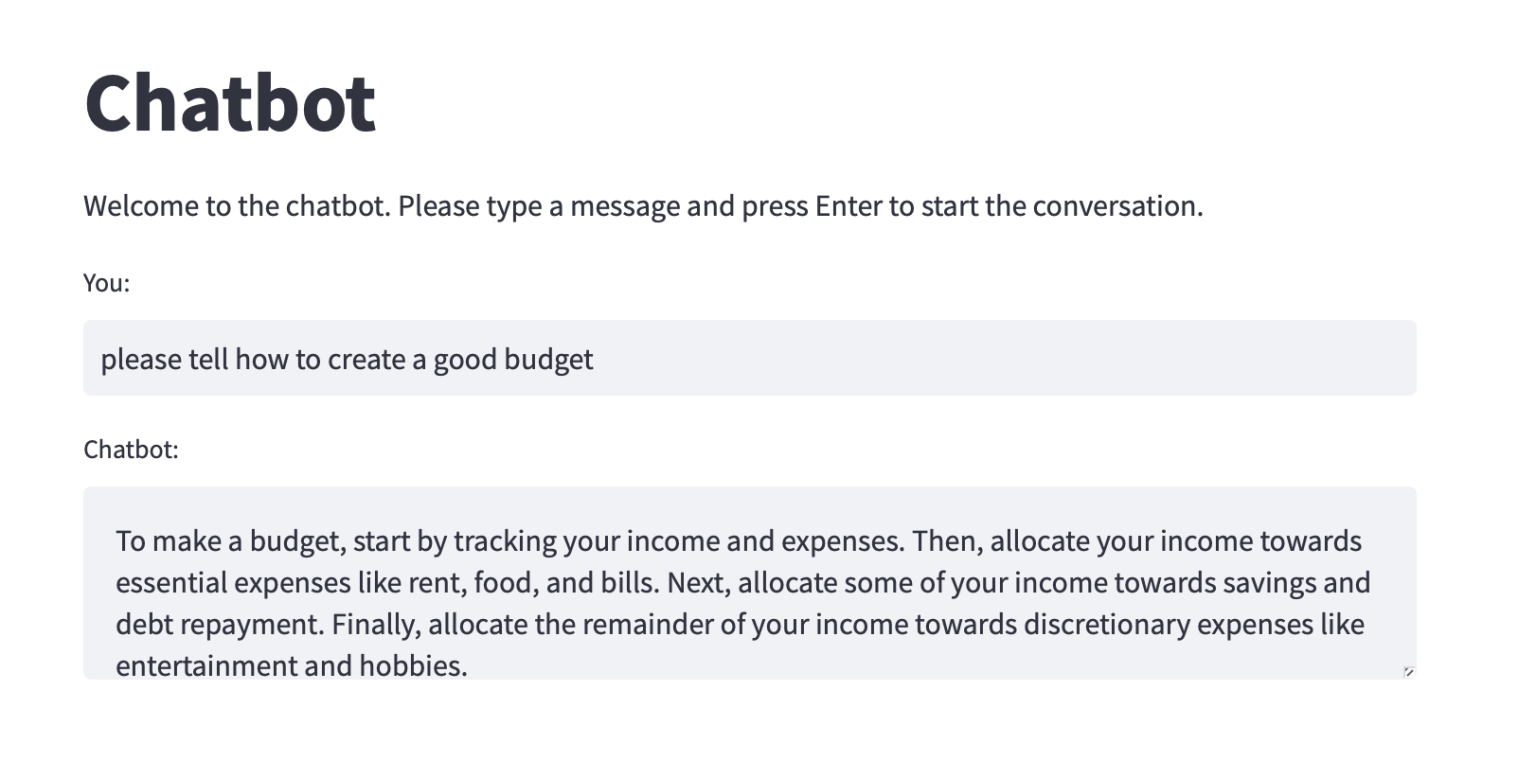

# Summary

An end-to-end chatbot refers to a chatbot that can handle a complete conversation from start to finish without requiring human assistance. Creating an end-to-end Chatbot involves collecting data, choosing a programming language and NLP tools, training the chatbot, and testing and refining it before making it available to users. I hope you liked this article on building an end-to-end chatbot using Python. Feel free to ask valuable questions in the comments section below.